<a href="https://colab.research.google.com/github/Bipin-6751/Machine-Learning-Collection/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


170508288/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train = y_train.reshape(-1,) # here -1 corresponds to retaining the dimension at that position(i.e 50000 is left untouched) while putting nothing after , means flattening the array into simple number

In [16]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

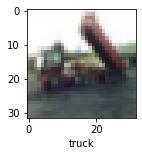

In [20]:
plot_sample(X_train, y_train, 2)

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8116 - accuracy: 0.3572
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6241 - accuracy: 0.4248
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5397 - accuracy: 0.4586
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4818 - accuracy: 0.4756
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4338 - accuracy: 0.4980


**NOte: AAN performs very low for image classification**

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.38      0.49      1000
           1       0.67      0.55      0.60      1000
           2       0.41      0.31      0.35      1000
           3       0.34      0.38      0.36      1000
           4       0.39      0.45      0.42      1000
           5       0.38      0.38      0.38      1000
           6       0.58      0.44      0.50      1000
           7       0.45      0.66      0.53      1000
           8       0.54      0.68      0.60      1000
           9       0.56      0.59      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 4ms/step - loss: 1.4847 - accuracy: 0.4673
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1136 - accuracy: 0.6110
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9804 - accuracy: 0.6603
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8992 - accuracy: 0.6860
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8341 - accuracy: 0.7121
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7777 - accuracy: 0.7302
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7295 - accuracy: 0.7459
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6892 - accuracy: 0.7610
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6478 - accuracy: 0.7743
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.61

In [30]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8723 - accuracy: 0.7117


[0.8722713589668274, 0.7117000222206116]

In [31]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.15629214e-03, 1.11897745e-04, 4.89743287e-03, 5.59875488e-01,
        2.03525648e-04, 1.27260491e-01, 6.12287782e-03, 3.41839841e-05,
        2.91961551e-01, 1.37623388e-03],
       [6.25563739e-03, 3.68327321e-03, 4.48570972e-05, 1.17722684e-05,
        5.42756652e-06, 1.80445099e-08, 2.13863571e-09, 1.52599213e-07,
        9.89731371e-01, 2.67524767e-04],
       [2.38098726e-01, 1.81459919e-01, 9.11782263e-04, 1.36661846e-02,
        2.44795135e-03, 1.70550440e-04, 1.24241069e-05, 4.34208056e-03,
        5.43303847e-01, 1.55865075e-02],
       [7.98904181e-01, 1.12282652e-02, 4.94125392e-03, 1.05386425e-03,
        1.70764362e-03, 6.78390688e-06, 6.91056019e-04, 7.05985485e-06,
        1.81366310e-01, 9.35945718e-05],
       [1.32138905e-06, 1.11750239e-06, 1.53076882e-02, 8.25025083e-04,
        7.34482855e-02, 1.49565312e-04, 9.10265505e-01, 2.51394283e-07,
        1.19064873e-06, 7.28627327e-08]], dtype=float32)

In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [34]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

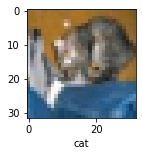

In [33]:
plot_sample(X_test, y_test, 0)

In [36]:
classes[y_classes[0]]

'cat'

In [37]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.85      0.81      0.83      1000
           2       0.60      0.61      0.61      1000
           3       0.56      0.49      0.52      1000
           4       0.63      0.70      0.67      1000
           5       0.64      0.59      0.62      1000
           6       0.80      0.75      0.77      1000
           7       0.75      0.75      0.75      1000
           8       0.76      0.84      0.80      1000
           9       0.77      0.82      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

